In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
food = pd.read_csv(r"C:\Users\GASTO\Downloads\food_consumption.csv")

In [3]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [4]:
food.isna().sum()

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [5]:
food.duplicated().sum()

np.int64(0)

In [6]:
food.head(100)

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96
...,...,...,...,...
95,Brazil,Wheat and Wheat Products,53.00,10.11
96,Brazil,Rice,32.13,41.12
97,Brazil,Soybeans,3.62,1.63
98,Brazil,Nuts inc. Peanut Butter,0.67,1.19


In [7]:
food.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

**The average C02 emission per person by food category among five countries (Kenya, Uganda, Tanzania, Rwanda and Ethiopia) located in East Africa.**


In [9]:
plant_based = ['Wheat and Wheat Products','Rice','Soybeans','Nuts inc. Peanut Butter']
food['food_type'] = np.where(food['food_category'].isin(plant_based),'Plant_Based','Animal_Based')
ea_df = food.query("country == ['Kenya','Uganda','Tanzania','Rwanda','Ethiopia']")
df_emm = ea_df.groupby(['food_category','food_type'])[['co2_emmission']].mean().sort_values(by='co2_emmission').reset_index()
df_emm

,food_category,food_type,co2_emmission
0,Soybeans,Plant_Based,0.236
1,Eggs,Animal_Based,0.718
2,Poultry,Animal_Based,1.250
3,Pork,Animal_Based,3.370
4,Wheat and Wheat Products,Plant_Based,3.940
5,Nuts inc. Peanut Butter,Plant_Based,4.650
6,Fish,Animal_Based,8.428
7,Rice,Plant_Based,12.680
8,Lamb & Goat,Animal_Based,55.262
9,Milk - inc. cheese,Animal_Based,63.754


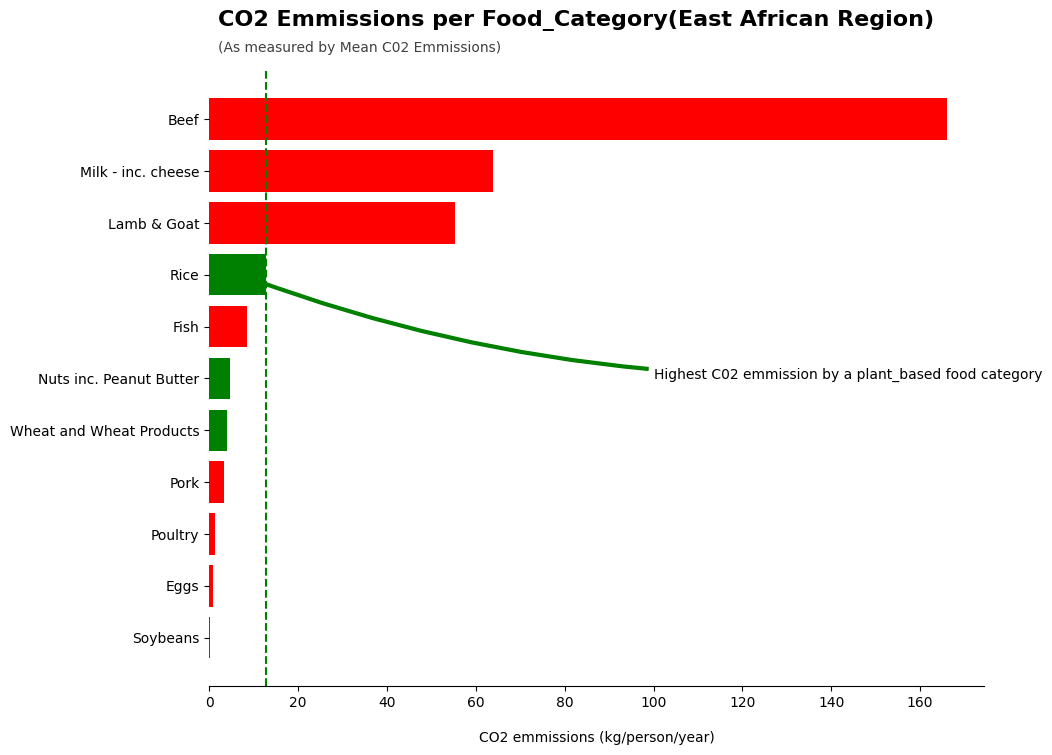

In [11]:
plt.figure(figsize=(10,8))
colors = ['red' if word == 'Animal_Based' else 'green' for word in df_emm.food_type]
y_pos = np.arange(len(df_emm['co2_emmission']))
ax = plt.barh(df_emm['food_category'],width = df_emm.co2_emmission,color = colors)
sns.despine(left=True,top=True,right=True)
ynew = df_emm.query("food_category == 'Rice'")['co2_emmission'].iloc[0]
plt.xlabel('CO2 emmissions (kg/person/year)',labelpad=15)
plt.axvline(ynew,linestyle = '--',color='green')
plt.annotate('Highest C02 emmission by a plant_based food category',xy=(7,7),xytext=(100,5),arrowprops={'arrowstyle':'simple','color':'green','connectionstyle':"arc3,rad=-0.1"})
plt.text(x=2, y=11.8, s='CO2 Emmissions per Food_Category(East African Region)', fontsize=16, weight='bold')
plt.text(x=2, y=11.3, s='(As measured by Mean C02 Emmissions)', fontsize=10, alpha=0.75)
plt.savefig('CO2_EmmissionsEA.png')

The visualization above, it's shows that the Top 3 food categories are all Animal_Based.

This clearly highlights the vast difference in contributions between Plant_based and Animal_based food categories, especially beef.

 mark  the difference between consumption and emissions in the various food categories


In [12]:
data = food.groupby('food_category')[['consumption','co2_emmission']].sum().sort_values(by='co2_emmission',ascending=False).reset_index()
data

,food_category,consumption,co2_emmission
0,Beef,1576.04,48633.26
1,Milk - inc. cheese,16350.71,23290.00
2,Lamb & Goat,338.02,11837.38
3,Pork,2096.08,7419.11
4,Rice,3818.77,4886.91
5,Fish,2247.32,3588.22
6,Poultry,2758.50,2963.16
7,Wheat and Wheat Products,9301.44,1773.78
8,Eggs,1061.29,974.95
9,Nuts inc. Peanut Butter,537.84,951.99


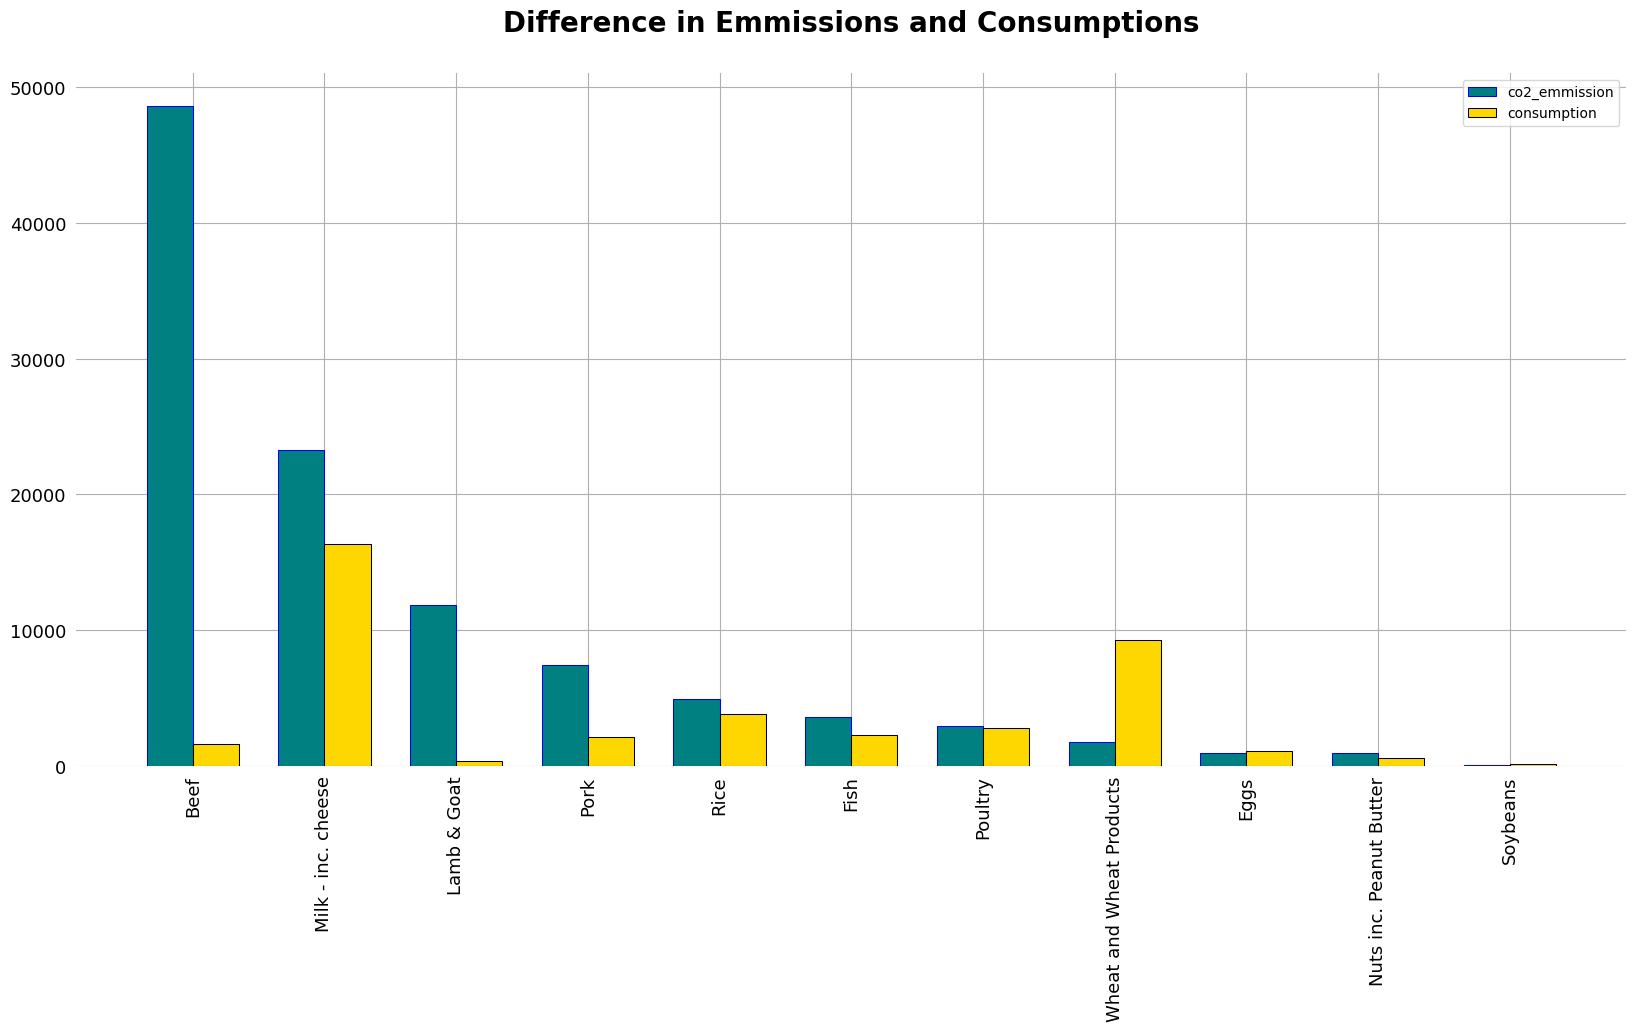

In [15]:
fig,ax = plt.subplots(figsize=(20,9))

width = 0.35
sort_order = data["food_category"].to_list()

sns.despine(top=True,right=True,bottom=True,left=True)
plt.grid(visible=True)

height_con = data['consumption']
height_emm = data['co2_emmission']
X = np.arange(len(height_emm))

plt.bar(X, height_emm, ec = "blue", lw = .75,color = "teal",zorder = 3, width = width,label = "co2_emmission")
plt.bar(X + width, height_con, ec = "black", lw = .75,color = "gold",zorder = 3, width = width,label = "consumption")

ax.set_xticks(ticks= X + width/2, labels=sort_order, rotation=90)
plt.tick_params(axis='both',labelsize=13,direction='out',left=False,bottom=False)

plt.legend()
plt.title('Difference in Emmissions and Consumptions',fontsize=20,fontweight='bold',pad=30)
plt.savefig('Emmissions vs Consumptions.png')

food consumption of animal and non-animal products and the impact on carbon footprint

In [17]:
df = food.groupby(['food_category','food_type'])[['consumption']].mean().sort_values(by='consumption').reset_index()
df

,food_category,food_type,consumption
0,Soybeans,Plant_Based,0.860538
1,Lamb & Goat,Animal_Based,2.600154
2,Nuts inc. Peanut Butter,Plant_Based,4.137231
3,Eggs,Animal_Based,8.163769
4,Beef,Animal_Based,12.123385
5,Pork,Animal_Based,16.123692
6,Fish,Animal_Based,17.287077
7,Poultry,Animal_Based,21.219231
8,Rice,Plant_Based,29.375154
9,Wheat and Wheat Products,Plant_Based,71.549538


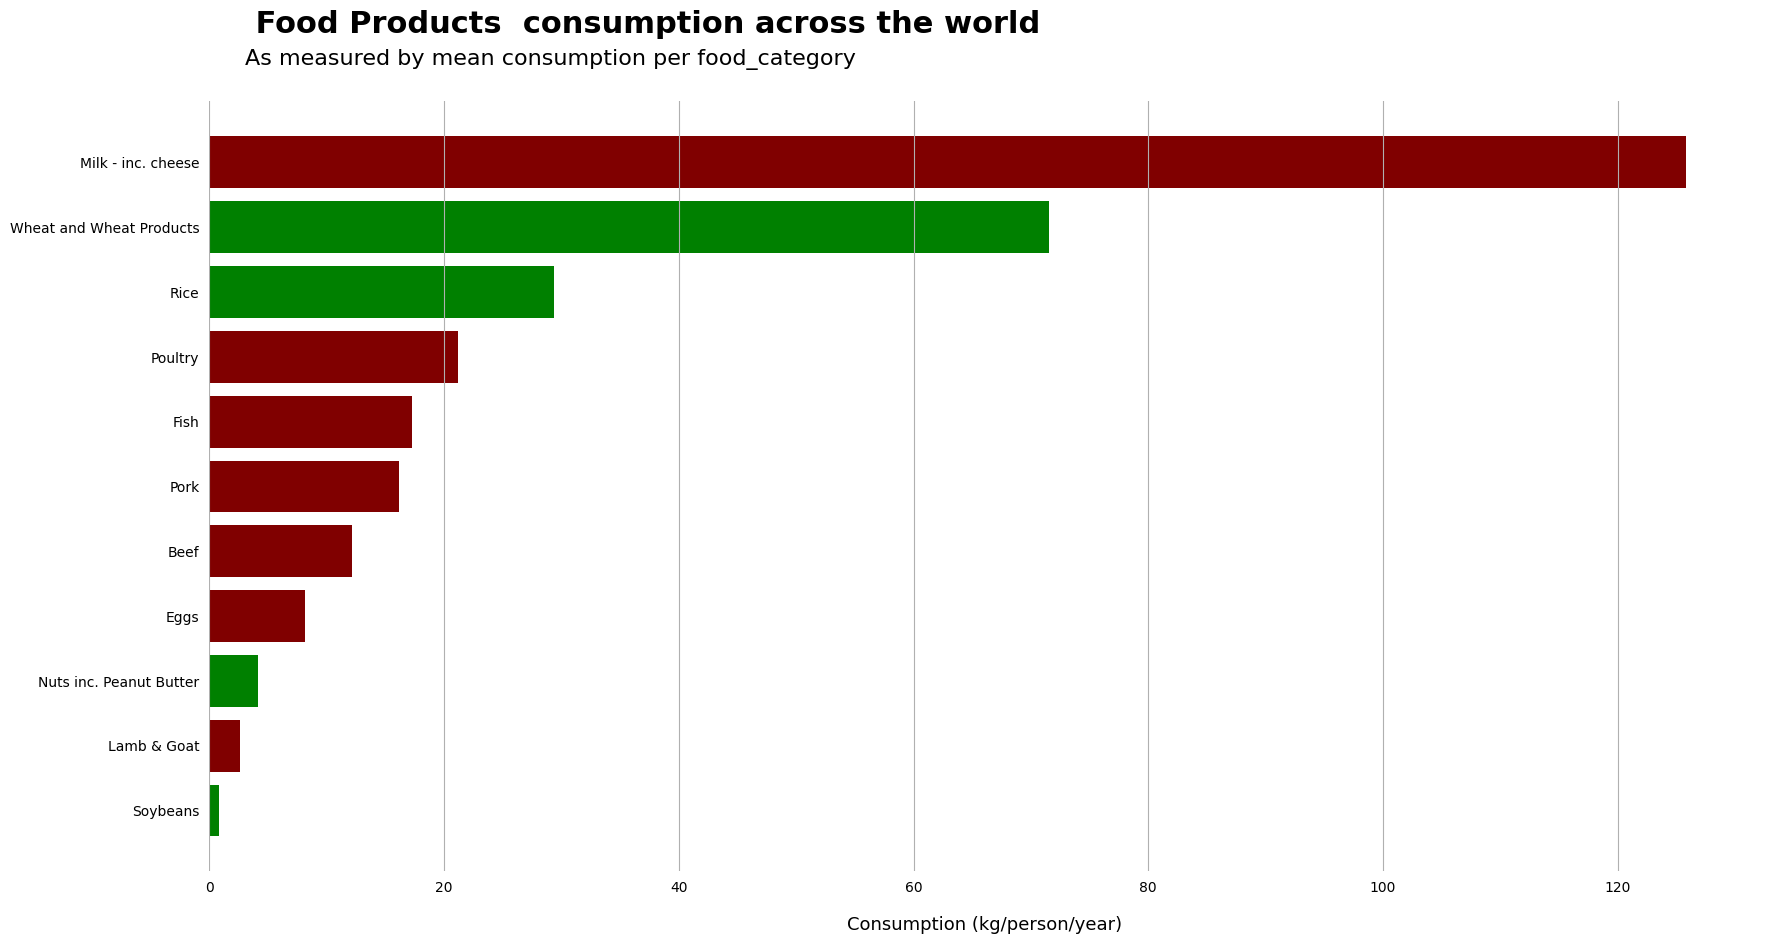

In [19]:
plt.figure(figsize=(20,10))
colors = ['maroon' if word == 'Animal_Based' else 'green' for word in df.food_type]
plt.barh(df['food_category'],df['consumption'],color=colors)
sns.despine(top=True,right=True,bottom=True,left=True)
plt.tick_params(left=False,bottom=False)
plt.grid(axis='x')
plt.text(x=3,y=12,s=' Food Products  consumption across the world',weight='bold',fontsize=22)
plt.text(x=3,y=11.5,s='As measured by mean consumption per food_category',fontsize=16)
plt.xlabel('Consumption (kg/person/year)',labelpad=15,fontsize=13)
plt.savefig('consumption.png')

Beef's contribution to CO2 emissions (kg/person/year)

In [20]:
beef_df = food.query('food_category == "Beef"')[['country','co2_emmission']]
beef_df

,country,co2_emmission
2,Argentina,1712.00
13,Australia,1044.85
24,Albania,694.30
35,Iceland,412.26
46,New Zealand,693.99
...,...,...
1377,Sierra Leone,61.41
1388,Sri Lanka,42.58
1399,Indonesia,79.92
1410,Liberia,24.07


In [16]:
food.loc[food['country']=='Tanzania']

,country,food_category,consumption,co2_emmission
1122,Tanzania,Pork,0.32,1.13
1123,Tanzania,Poultry,1.84,1.98
1124,Tanzania,Beef,6.09,187.92
1125,Tanzania,Lamb & Goat,1.28,44.83
1126,Tanzania,Fish,5.50,8.78
1127,Tanzania,Eggs,0.58,0.53
1128,Tanzania,Milk - inc. cheese,40.29,57.39
1129,Tanzania,Wheat and Wheat Products,15.94,3.04
1130,Tanzania,Rice,21.01,26.89
1131,Tanzania,Soybeans,0.04,0.02


In [17]:
countries_list=food.loc[902:1286]
countries_list

,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
...,...,...,...,...
1282,Rwanda,Milk - inc. cheese,7.23,10.30
1283,Rwanda,Wheat and Wheat Products,11.34,2.16
1284,Rwanda,Rice,8.70,11.13
1285,Rwanda,Soybeans,1.93,0.87


In [62]:
countries_list.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [63]:
data= countries_list[["country", "food_category", "co2_emmission"]]
data        

,country,food_category,co2_emmission
902,Kenya,Pork,1.03
903,Kenya,Poultry,0.50
904,Kenya,Beef,294.38
905,Kenya,Lamb & Goat,65.14
906,Kenya,Fish,6.82
...,...,...,...
1282,Rwanda,Milk - inc. cheese,10.30
1283,Rwanda,Wheat and Wheat Products,2.16
1284,Rwanda,Rice,11.13
1285,Rwanda,Soybeans,0.87


In [64]:
grouped_data=data.groupby(['country','food_category'])['co2_emmission'].mean().reset_index
grouped_data

<bound method Series.reset_index of country   food_category           
Angola    Beef                        259.82
          Eggs                          1.02
          Fish                         24.33
          Lamb & Goat                  37.82
          Milk - inc. cheese           17.52
                                       ...  
Zimbabwe  Pork                          9.38
          Poultry                       5.34
          Rice                         12.91
          Soybeans                      0.24
          Wheat and Wheat Products      5.97
Name: co2_emmission, Length: 385, dtype: float64>

In [30]:
data.food_category

902                         Pork
903                      Poultry
904                         Beef
905                  Lamb & Goat
906                         Fish
                  ...           
1282          Milk - inc. cheese
1283    Wheat and Wheat Products
1284                        Rice
1285                    Soybeans
1286     Nuts inc. Peanut Butter
Name: food_category, Length: 385, dtype: object

In [36]:
food_choice=['Fish','Lamb & Goat','Beef']
selected_df = countries_list[countries_list["food_category"].isin(food_choice)]

In [48]:
selected_df.loc[:,"difference"] = selected_df["consumption"] - selected_df["co2_emmission"]
selected_df

,country,food_category,consumption,co2_emmission,difference
904,Kenya,Beef,9.54,294.38,-284.84
905,Kenya,Lamb & Goat,1.86,65.14,-63.28
906,Kenya,Fish,4.27,6.82,-2.55
915,Jordan,Beef,5.61,173.11,-167.50
916,Jordan,Lamb & Goat,5.68,198.91,-193.23
...,...,...,...,...,...
1268,Nigeria,Lamb & Goat,2.72,95.25,-92.53
1269,Nigeria,Fish,16.03,25.59,-9.56
1278,Rwanda,Beef,2.53,78.07,-75.54
1279,Rwanda,Lamb & Goat,1.93,67.59,-65.66


In [75]:
data.columns

Index(['country', 'food_category', 'co2_emmission'], dtype='object')

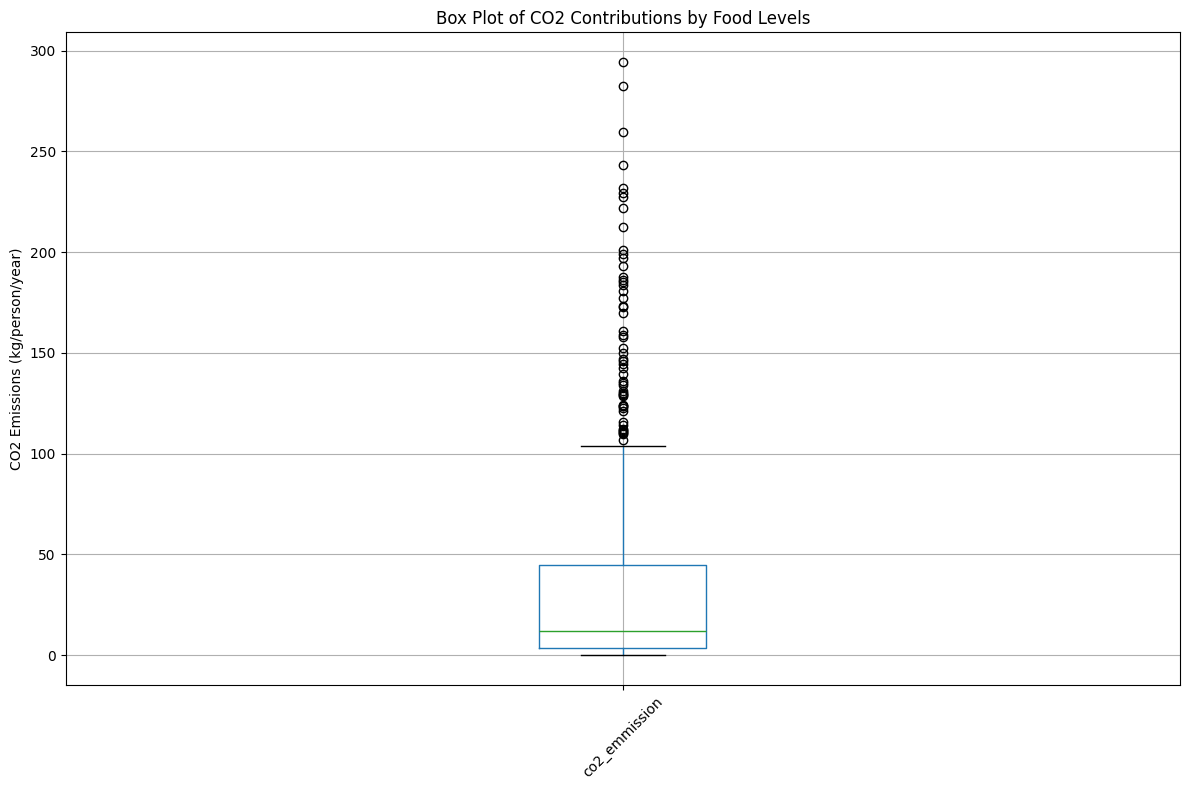

In [49]:
# Box plot of CO2 contributions by food levels
plt.figure(figsize=(12, 8))
data.boxplot()
plt.title("Box Plot of CO2 Contributions by Food Levels")
plt.ylabel("CO2 Emissions (kg/person/year)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
d1 = food.sort_values(by='co2_emmission',ascending=False)
d1.head()

,country,food_category,consumption,co2_emmission,food_type
2,Argentina,Beef,55.48,1712.00,Animal_Based
90,Brazil,Beef,39.25,1211.17,Animal_Based
57,USA,Beef,36.24,1118.29,Animal_Based
13,Australia,Beef,33.86,1044.85,Animal_Based
123,Bermuda,Beef,33.15,1022.94,Animal_Based


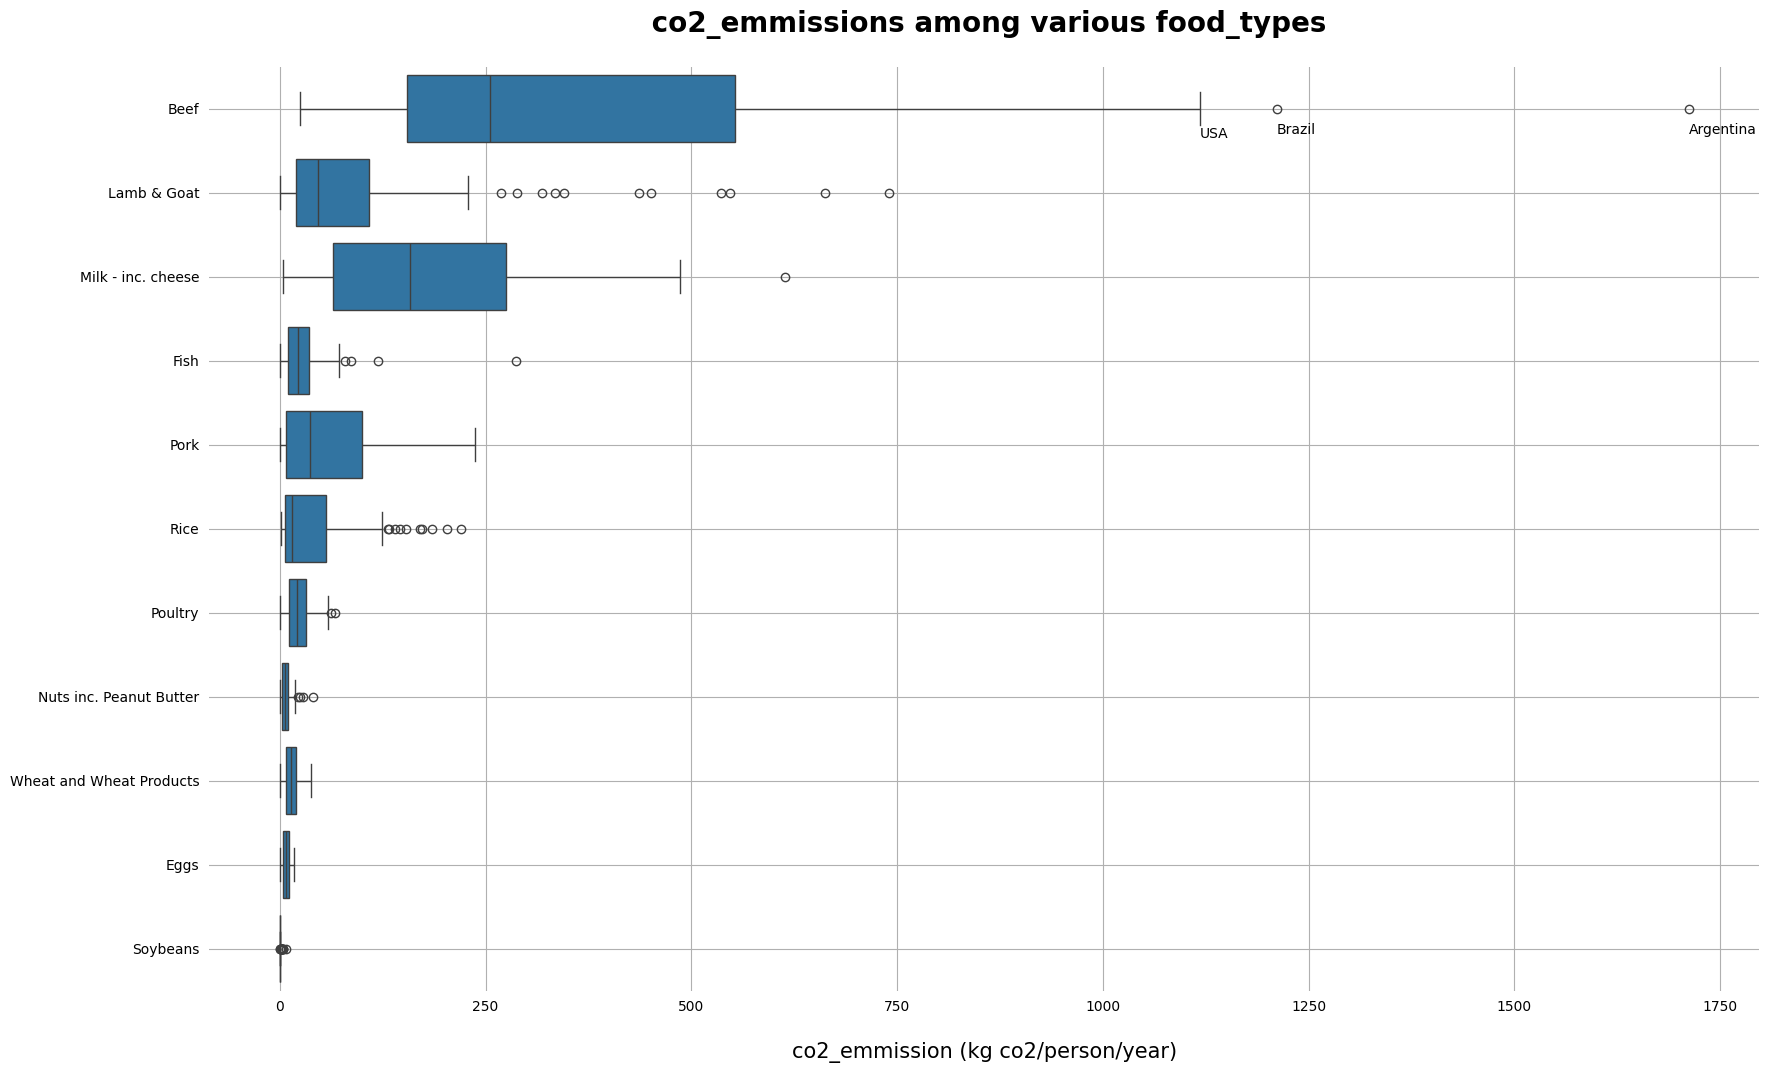

In [25]:
plt.figure(figsize=(20,12))
sns.boxplot(x=d1['co2_emmission'],y=d1['food_category'])
plt.tick_params(left=False,bottom=False)
plt.xlabel('co2_emmission (kg co2/person/year)',fontsize=15,labelpad=20)
plt.annotate('Brazil',xy=(1211.17,0.3))
plt.annotate('Argentina',xy=(1712,0.3))
plt.annotate('USA',xy=(1118.29,0.35))
plt.ylabel('')
plt.grid()
sns.despine(top=True,bottom=True,left=True,right=True)
plt.title(' co2_emmissions among various food_types',fontsize=20,weight='bold',pad=25)
plt.savefig('co2_emmissions_dist.png')

Top 10 Countries with highest emissions. Choose the appropriate visual type

In [26]:
top = food.groupby('country')[['co2_emmission']].sum().sort_values(by='co2_emmission',ascending=False).reset_index().head(10)
top

,country,co2_emmission
0,Argentina,2172.40
1,Australia,1938.66
2,Albania,1777.85
3,New Zealand,1750.95
4,Iceland,1731.36
5,USA,1718.86
6,Uruguay,1634.91
7,Brazil,1616.73
8,Luxembourg,1598.41
9,Kazakhstan,1575.08


In [28]:
beef = food.groupby(['country','food_category'])[['co2_emmission']].sum().reset_index()
beef

,country,food_category,co2_emmission
0,Albania,Beef,694.30
1,Albania,Eggs,11.44
2,Albania,Fish,6.15
3,Albania,Lamb & Goat,536.50
4,Albania,Milk - inc. cheese,432.62
...,...,...,...
1425,Zimbabwe,Pork,9.38
1426,Zimbabwe,Poultry,5.34
1427,Zimbabwe,Rice,12.91
1428,Zimbabwe,Soybeans,0.24


In [29]:
d2 = pd.merge(top,beef,on='country',how='left')
d2


,country,co2_emmission_x,food_category,co2_emmission_y
0,Argentina,2172.40,Beef,1712.00
1,Argentina,2172.40,Eggs,10.46
2,Argentina,2172.40,Fish,6.96
3,Argentina,2172.40,Lamb & Goat,54.63
4,Argentina,2172.40,Milk - inc. cheese,277.87
...,...,...,...,...
105,Kazakhstan,1575.08,Pork,36.67
106,Kazakhstan,1575.08,Poultry,19.74
107,Kazakhstan,1575.08,Rice,9.37
108,Kazakhstan,1575.08,Soybeans,0.01


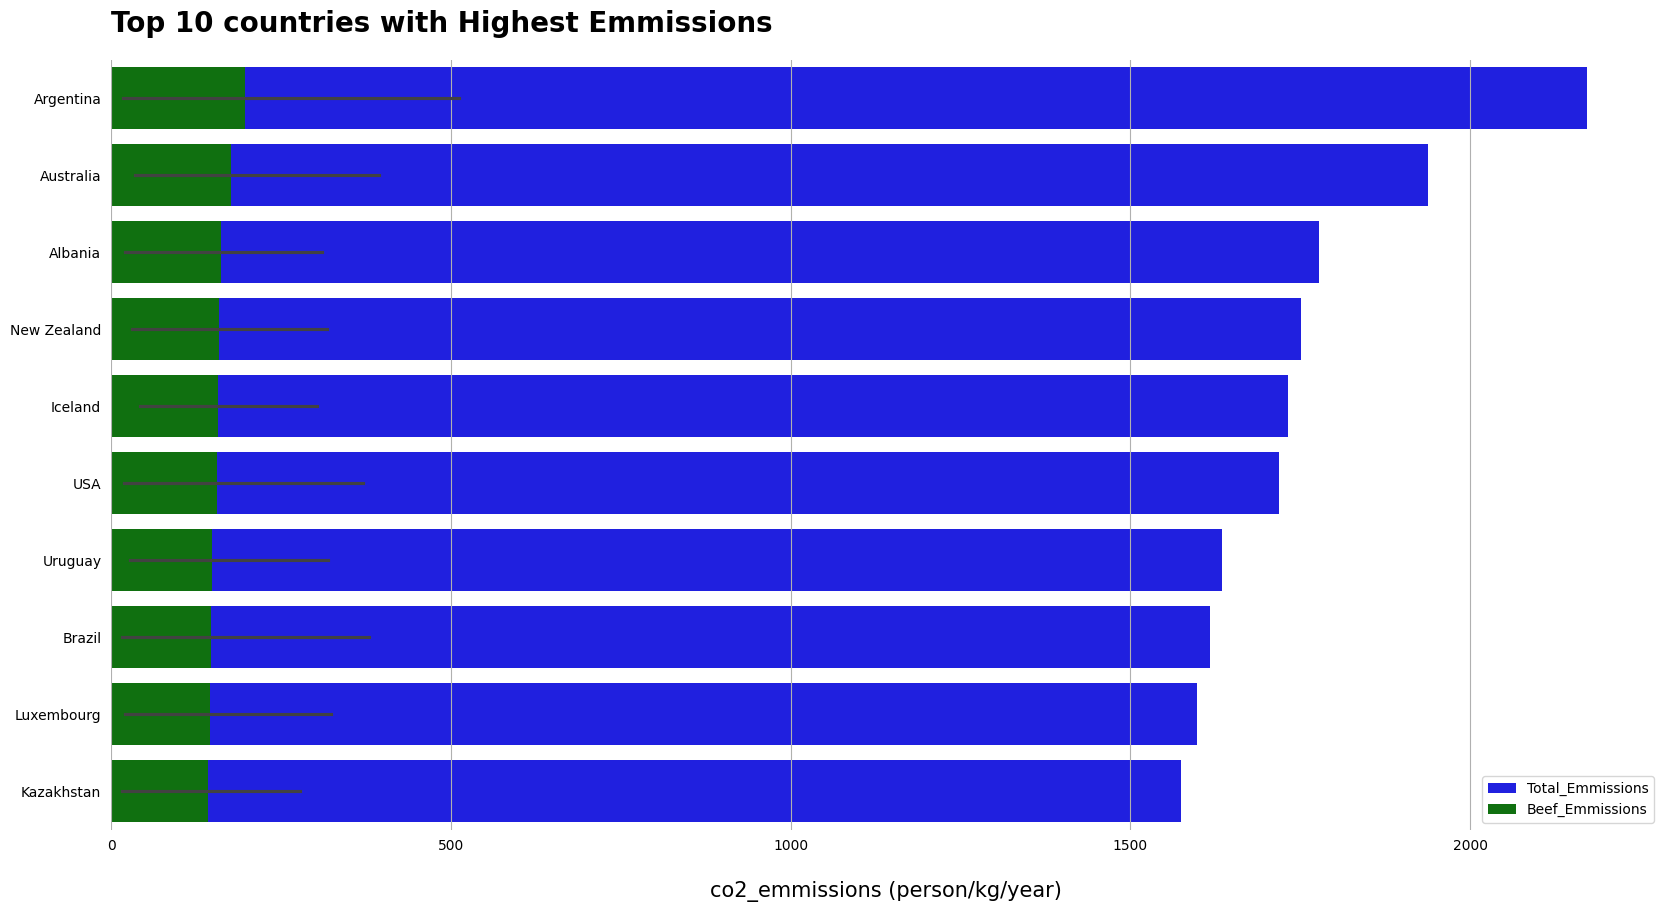

In [30]:
plt.figure(figsize=(20,10))
plt.grid(axis='x')
sns.barplot(data=d2,x='co2_emmission_x',y='country',color='blue',label='Total_Emmissions')
sns.barplot(data=d2,x='co2_emmission_y',y='country',color='green',label='Beef_Emmissions')
sns.despine(bottom=True,left=True)
plt.legend()
plt.tick_params(left=False,bottom=False)

plt.ylabel('')
plt.xlabel('co2_emmissions (person/kg/year)',labelpad=20,fontsize=15)
plt.title('Top 10 countries with Highest Emmissions',pad=20,fontweight='bold',loc='left',fontsize=20)
plt.savefig('Highest_Emm_Countries.png')